In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sb

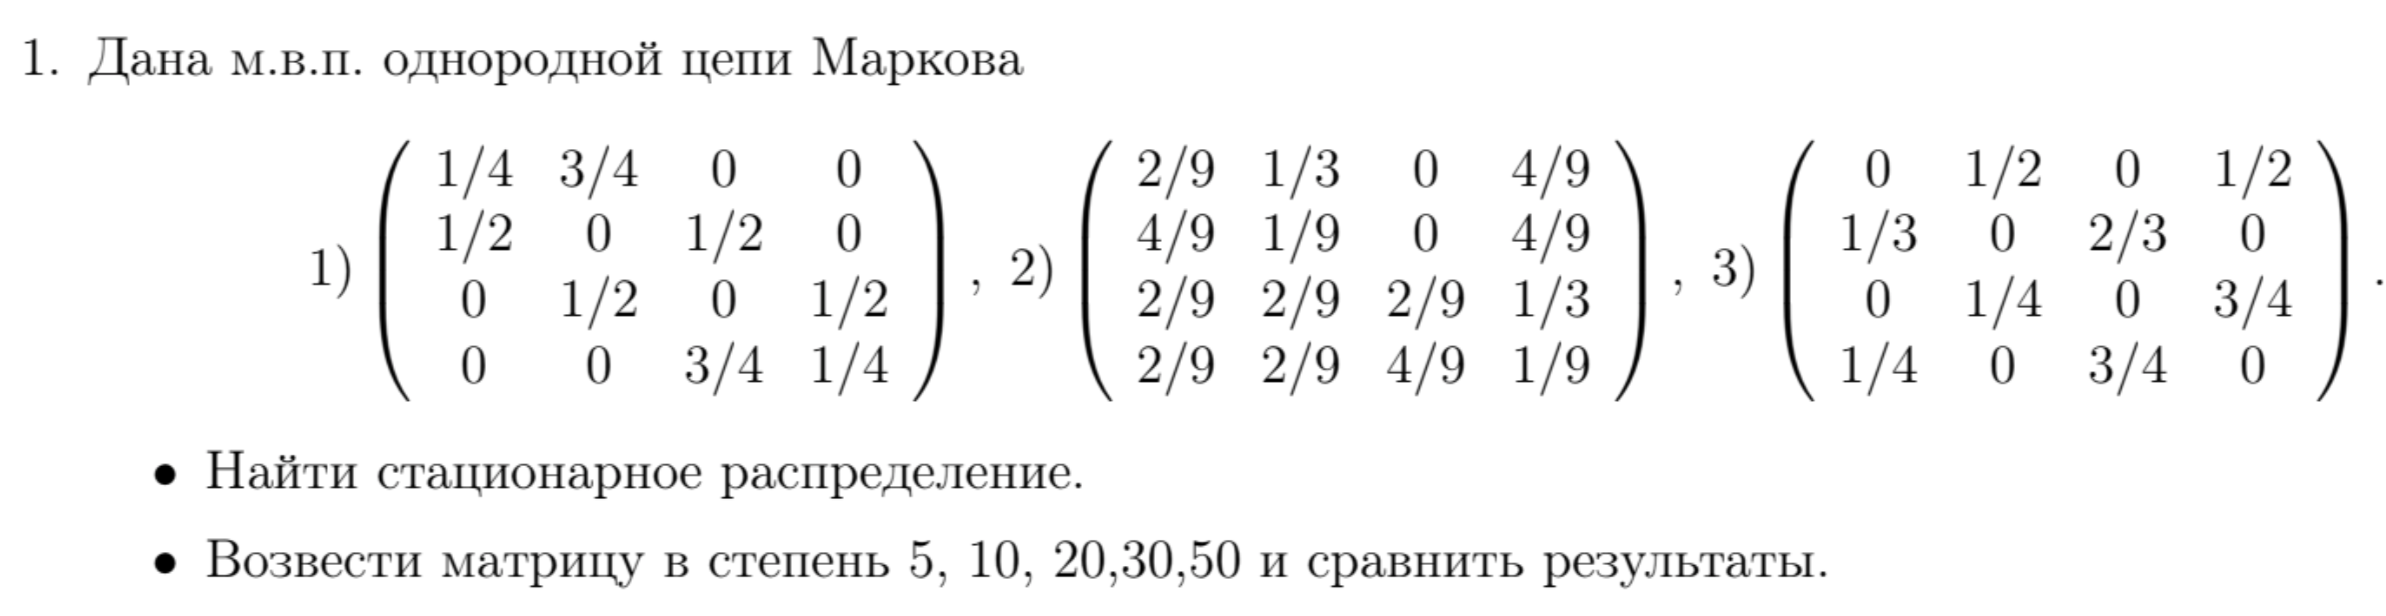

In [2]:
A = np.array([[1/4, 3/4, 0, 0],
             [1/2, 0, 1/2, 0],
             [0, 1/2, 0, 1/2],
             [0, 0, 3/4, 1/4]])
B = np.array([[2/9, 1/3, 0, 4/9],
             [4/9, 1/9, 0, 4/9],
             [2/9, 2/9, 2/9, 1/3],
             [2/9, 2/9, 4/9, 1/9]])
C = np.array([[0, 1/2, 0, 1/2],
            [1/3, 0, 2/3, 0],
            [0, 1/4, 0, 3/4],
            [1/4, 0, 3/4, 0]])
def find_stationary(matrix):
    eig_val, eig_vecs = np.linalg.eig(matrix.T)
    res = (eig_vecs[:,np.isclose(eig_val, 1)][:,0]
           / eig_vecs[:,np.isclose(eig_val, 1)][:,0].sum()).real
    return res
def task(matrix):
    degs = (5, 10, 20, 30, 50)
    print(f'Our matrix: \n {matrix}')
    for n in degs:
        res = np.linalg.matrix_power(matrix, n)
        print(f'{n}-th degree of matrix: \n {res}', '\n')
    print(f'Stationary distr is \n{find_stationary(matrix)}', '\n')
task(A) # при А и Б работает эргодическая теорема, при С - нет, поскольку она периодична, d = 2

Our matrix: 
 [[0.25 0.75 0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.75 0.25]]
5-th degree of matrix: 
 [[0.17675781 0.43066406 0.16992188 0.22265625]
 [0.28710938 0.14648438 0.453125   0.11328125]
 [0.11328125 0.453125   0.14648438 0.28710938]
 [0.22265625 0.16992188 0.43066406 0.17675781]] 

10-th degree of matrix: 
 [[0.22371578 0.25403881 0.34596062 0.17628479]
 [0.16935921 0.36967659 0.23032379 0.23064041]
 [0.23064041 0.23032379 0.36967659 0.16935921]
 [0.17628479 0.34596062 0.25403881 0.22371578]] 

20-th degree of matrix: 
 [[0.20394139 0.29141525 0.30858475 0.19605861]
 [0.19427683 0.31252614 0.28747386 0.20572317]
 [0.20572317 0.28747386 0.31252614 0.19427683]
 [0.19605861 0.30858475 0.29141525 0.20394139]] 

30-th degree of matrix: 
 [[0.20071303 0.29844139 0.30155861 0.19928697]
 [0.19896093 0.30227164 0.29772836 0.20103907]
 [0.20103907 0.29772836 0.30227164 0.19896093]
 [0.19928697 0.30155861 0.29844139 0.20071303]] 

50-th degree of matrix: 
 

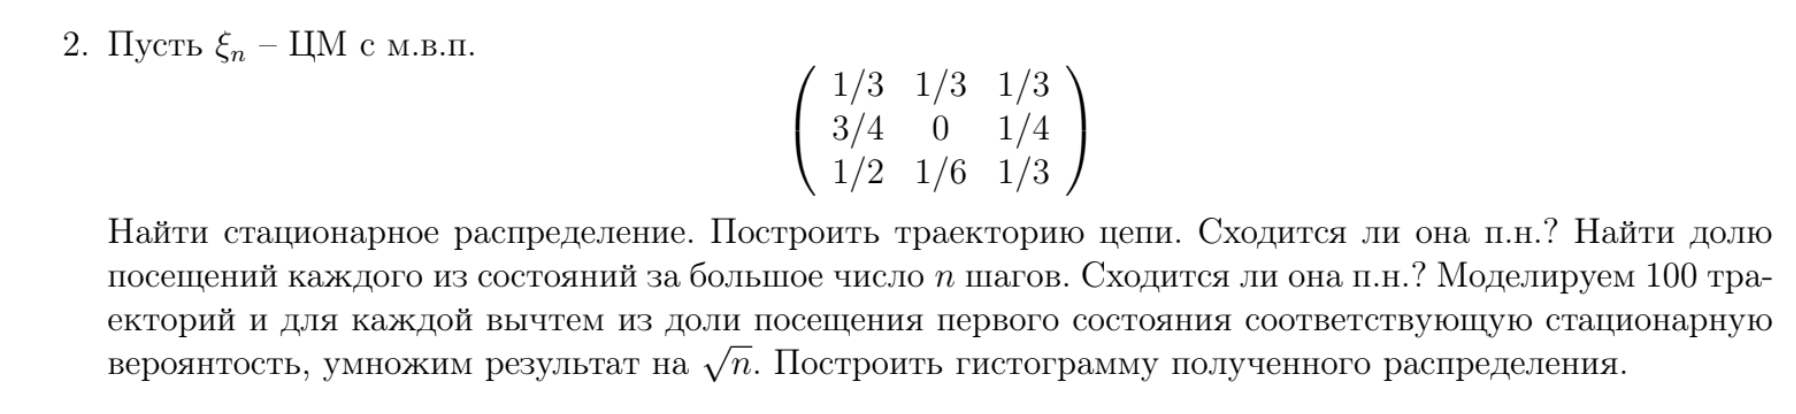


[97 51 52]
[0.485 0.255 0.26 ]
[0.47368421 0.21052632 0.31578947]


<Axes: ylabel='Count'>

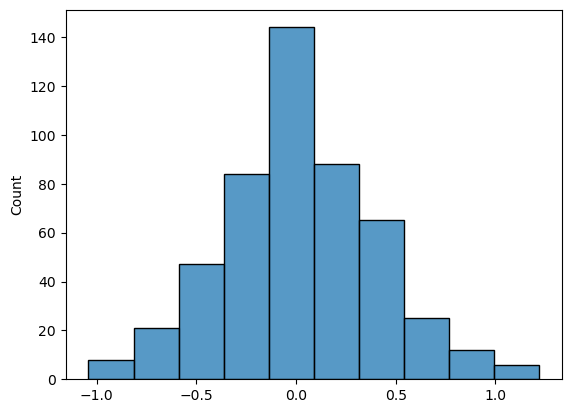

In [6]:
matrix = np.array([[1/3,1/3,1/3],
                 [3/4,0,1/4],
                 [1/2,1/6,1/3]])
stat = find_stationary(matrix)

n = 200 #steps
def get_trajectory(size):
    start_state = 0
    prev_state = start_state
    trajectory = []
    trajectory.append(start_state)
    while size-1:
        state = prev_state
        curr_state= np.random.choice([0, 1, 2], p=matrix[state])
        trajectory.append(curr_state)
        prev_state = curr_state
        size -= 1
    return trajectory
counts = np.bincount(get_trajectory(n))
print(counts)
print(counts / n) # траектория не может сходиться, поскольку тогда было бы поглощающее состояние и было бы все плохо
print(stat)    # доля посещений сходится к стационарному распределению (это эргодическая штука :/)
array = []
num_trajects = 500
for j in range(num_trajects):
    traj = get_trajectory(n)
    share = np.bincount(get_trajectory(n))/n
    array.append(np.sqrt(n)*(share[0] - stat[0]))
sb.histplot(array, bins = 10)

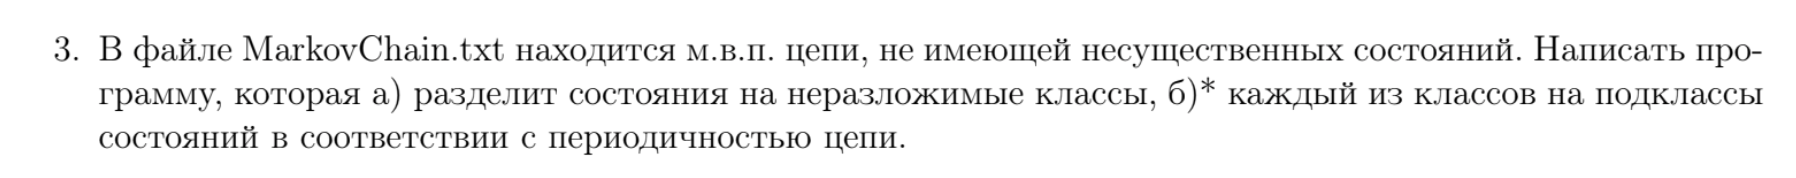


In [378]:
def find_recurrent_classes(matrix):
    n = len(matrix)
    visited = [False] * n
    recurrent_classes = []
    def dfs(node, current_class):
        visited[node] = True
        current_class.append(node)
        for next_node in range(n):
            if matrix[node][next_node] > 0 and not visited[next_node]:
                dfs(next_node, current_class)
    for node in range(n):
        if not visited[node]:
            current_class = []
            dfs(node, current_class)
            recurrent_classes.append(current_class)
    return recurrent_classes

def divide_into_subclasses(matrix, class_):
    saved_classes = []
    start_state = {class_[0]}
    saved_classes.append(start_state)
    def dfs(start_nodes):
        current_class = set()
        for start_node in start_nodes:
            for next_node in class_:
                if matrix[start_node][next_node] > 0:
                    current_class.add(next_node)
        flag = (current_class in saved_classes)
        if not flag:
            saved_classes.append(current_class)
            dfs(current_class)
        else:
            res_idx = saved_classes.index(current_class)
            for j in range(res_idx):
                saved_classes.pop(0)
    dfs(start_state)
    return saved_classes

transition_matrix = np.loadtxt('MarkovChain.txt', delimiter=';')
recurrent_classes = find_recurrent_classes(transition_matrix)
for i, class_ in enumerate(recurrent_classes):
    print(f"Recurrent class #{i+1}:", class_)
    subclasses = divide_into_subclasses(transition_matrix, class_)
    for j, subclass in enumerate(subclasses):
        print(f"Subclass #{j+1}:", subclass)
    print()

Recurrent class #1: [0, 37]
Subclass #1: {0}
Subclass #2: {37}

Recurrent class #2: [1, 5, 2, 10, 14, 9, 7, 12, 26, 11, 13, 15, 28, 20, 19, 21, 30, 25, 27, 29, 35, 44, 47, 49, 32, 33, 34, 42, 43]
Subclass #1: {5, 9, 11, 43, 20, 25}
Subclass #2: {32, 33, 2, 34, 7, 42, 13, 19, 27}
Subclass #3: {35, 10, 12, 44, 15, 47, 49, 21, 29}
Subclass #4: {1, 14, 26, 28, 30}

Recurrent class #3: [3, 17, 48]
Subclass #1: {3}
Subclass #2: {17}
Subclass #3: {48}

Recurrent class #4: [4, 16, 18, 22, 41, 46]
Subclass #1: {4}
Subclass #2: {16, 46}
Subclass #3: {41, 18, 22}

Recurrent class #5: [6, 24, 8, 36, 23, 40, 38, 45]
Subclass #1: {24, 40, 36, 45}
Subclass #2: {8, 38, 6, 23}

Recurrent class #6: [31, 39]
Subclass #1: {31}
Subclass #2: {39}



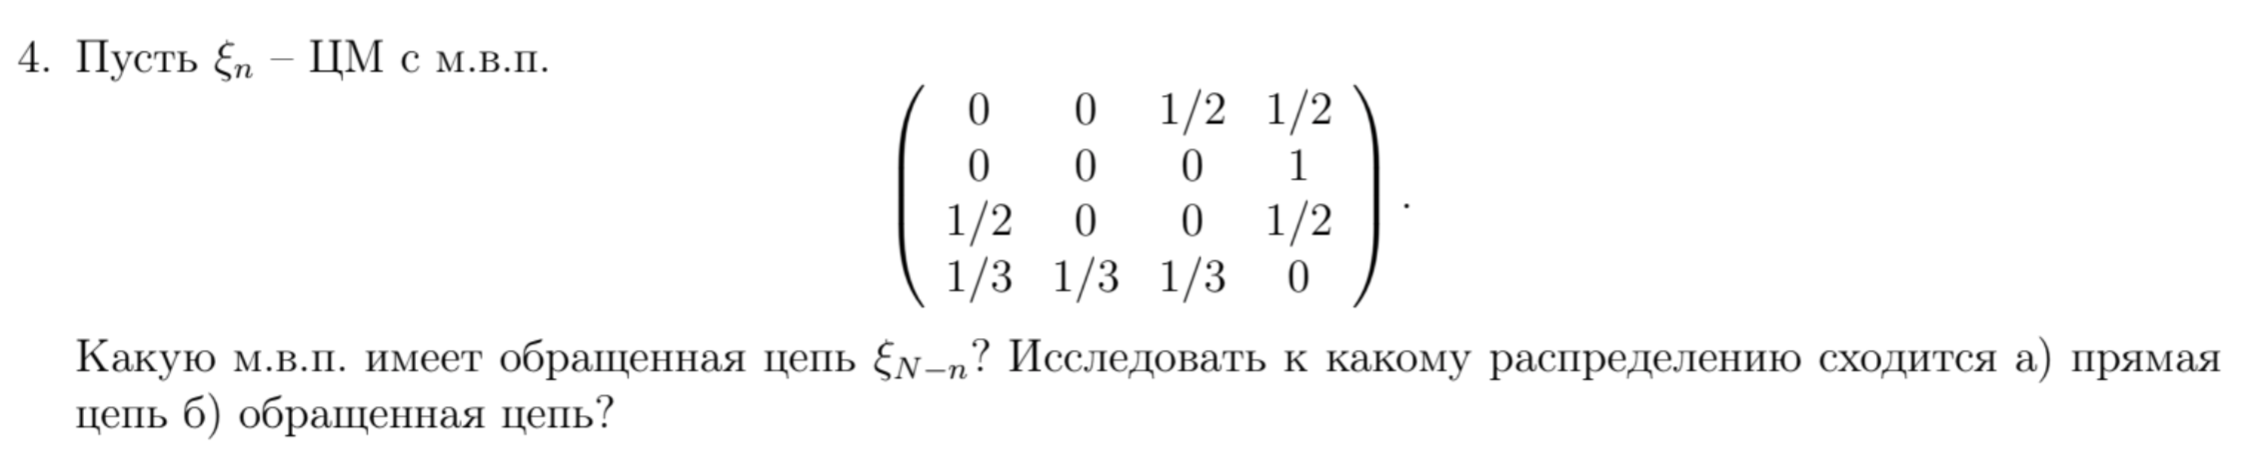

In [457]:
def reversed_markov_matrix(matrix):
    a = matrix.T
    res = (a/a.sum(axis=1).reshape(-1,1))
    return res
matrix = np.array([[0, 0, 1/2, 1/2],
                 [0, 0, 0, 1],
                 [1/2, 0, 0, 1/2],
                 [1/3, 1/3, 1/3, 0]])
stat_true = find_stationary(matrix)
reversed_matrix = reversed_markov_matrix(matrix)
stat_rev = find_stationary(reversed_matrix)
print("Reversed Markov Matrix:\n", reversed_matrix, '\n')
print(f"Stationary distr reversed: {stat_rev}")
print(f"Stationary distr original: {stat_true}")

Reversed Markov Matrix:
 [[0.   0.   0.6  0.4 ]
 [0.   0.   0.   1.  ]
 [0.6  0.   0.   0.4 ]
 [0.25 0.5  0.25 0.  ]] 

Stationary distr reversed: [0.22727273 0.18181818 0.22727273 0.36363636]
Stationary distr original: [0.25  0.125 0.25  0.375]


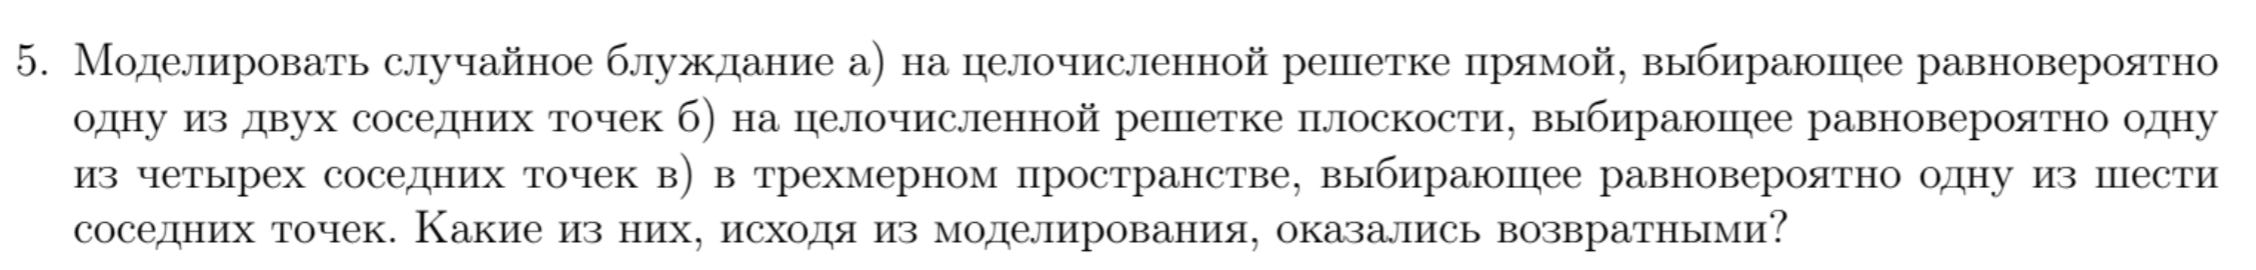

In [479]:
import random

def random_walk_1D(steps):
    position = 0
    flag = False
    for _ in range(steps):
        step = random.choice([-1, 1])
        position += step
        if position == 0:
            flag = True
            break
    return flag

def random_walk_2D(steps):
    position = [0, 0]
    flag = False
    for _ in range(steps):
        step = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        position[0] += step[0]
        position[1] += step[1]
        if position == [0, 0]:
            flag = True
            break
    return flag

def random_walk_3D(steps):
    position = [0, 0, 0]
    flag = False
    for _ in range(steps):
        step = random.choice([(0, 0, 1), (0, 0, -1), (0, 1, 0), (0, -1, 0), (1, 0, 0), (-1, 0, 0)])
        position[0] += step[0]
        position[1] += step[1]
        position[2] += step[2]
        if position == [0, 0, 0]:
            flag = True
            break
    return flag

def is_returning_walk(walk_func, steps, trials):
    returns_to_origin = sum([random_walk_1D(steps) for _ in range(trials)])
    return returns_to_origin / trials

steps = 1000
trials = 10000

return_probability_1D = is_returning_walk(random_walk_1D, steps, trials)
return_probability_2D = is_returning_walk(random_walk_2D, steps, trials)
return_probability_3D = is_returning_walk(random_walk_3D, steps, trials)

print("Вероятность вернуться для модели на прямой:", return_probability_1D)
print("Вероятность вернуться для модели на плоскости:", return_probability_2D)
print("Вероятность вернуться для модели в трехмерном пространстве:", return_probability_3D)


Вероятность вернуться для модели на прямой: 0.9744
Вероятность вернуться для модели на плоскости: 0.972
Вероятность вернуться для модели в трехмерном пространстве: 0.9759
